In [4]:
!pip install spacy
!pip install rdflib
!python -m spacy download en_core_web_sm
!pip install spacy rdflib SPARQLWrapper



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.6/12.8 MB 18.9 MB/s eta 0:00:01
     ----- ---------------------------------- 1.6/12.8 MB 20.5 MB/s eta 0:00:01
     -------- ------------------------------- 2.9/12.8 MB 22.9 MB/s eta 0:00:01
     ------------- -------------------------- 4.4/12.8 MB 25.7 MB/s eta 0:00:01
     ------------------- -------------------- 6.1/12.8 MB 28.0 MB/s eta 0:00:01
     ------------------------ --------------- 7.9/12.8 MB 29.8 MB/s eta 0:00:01
     ------------------------------ --------- 9.7/12.8 MB 31.1 MB/s eta 0:00:01
     ----------------------------------- --- 11.8/12.8 MB 36.4 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 38.6 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 36.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import spacy
import re
from spacy.lang.en import English

nlp = spacy.load("en_core_web_sm")

In [7]:
def preprocess_text(query):
    query = query.lower()
    query = re.sub(r'[^\w\s]', '', query)
    doc = nlp(query)
    tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    normalized_query = ' '.join(tokens)
    return normalized_query

In [8]:
def parse_query(query):
    preprocessed_query = preprocess_text(query)
    doc = nlp(preprocessed_query)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    relationships = [(token.lemma_, token.pos_, token.dep_, token.head.lemma_) for token in doc]
    return entities, relationships




In [9]:
query = "Give me all products created on June 1, 2024 by Idir."
entities, relationships = parse_query(query)
print("Entities:", entities)
print("Relationships:", relationships)

Entities: [('june 1 2024', 'DATE')]
Relationships: [('give', 'VERB', 'ROOT', 'give'), ('I', 'PRON', 'dative', 'give'), ('all', 'DET', 'det', 'product'), ('product', 'NOUN', 'nsubj', 'create'), ('create', 'VERB', 'ccomp', 'give'), ('on', 'ADP', 'prep', 'create'), ('june', 'PROPN', 'pobj', 'on'), ('1', 'NUM', 'nummod', 'june'), ('2024', 'NUM', 'nummod', 'june'), ('by', 'ADP', 'prep', 'create'), ('idir', 'PROPN', 'pobj', 'by')]


In [17]:
#old
rdf_mappings = {
    "physical product": "vpmReference:VPMReference",
    "person": "pno:Person",
    "document": "Document",
    "social content": "SocialContent",
    "post": "swym:Post",
    "idea": "swym:Idea",
    "custom document": "PLMDMT_DocCustom",
    "engineering document": "PLMDMTDocument",
    "aec member": "AecMember",
    "3d shape": "3DShape",
    "business role": "BusinessRoleClass",
    "vice president": "VicePresident",
    "engineer": "Engineer",
    "software engineer": "SoftwareEngineer",
    "data scientist": "DataScientist",
    "type": "ds6w:type",
    "modified": "ds6w:modified",
    "created": "ds6w:created",
    "last modified by": "ds6w:lastModifiedBy",
    "responsible": "ds6w:responsible",
    "comments": "ds6w:Comments",
    "likes": "ds6w:endorsements",
    "content structure": "ds6w:contentStructure",
    "document extension": "ds6w:docExtension",
    "business role": "ds6w:BusinessRole"
}

def map_terms_to_rdf(entities, relationships):
    """Map extracted entities and relationships to RDF URIs based on predefined mappings."""
    mapped_entities = {entity[0].lower(): rdf_mappings.get(entity[0].lower(), 'Unknown RDF Class') for entity in entities}
    mapped_relationships = {rel[0]: rdf_mappings.get(rel[0], 'Unknown RDF Property') for rel in relationships}
    return mapped_entities, mapped_relationships

mapped_entities, mapped_relationships = map_terms_to_rdf(entities, relationships)
print("Mapped Entities:", mapped_entities)
print("Mapped Relationships:", mapped_relationships)

Mapped Entities: {'june 1 2024': 'Unknown RDF Class'}
Mapped Relationships: {'give': 'Unknown RDF Property', 'I': 'Unknown RDF Property', 'all': 'Unknown RDF Property', 'product': 'Unknown RDF Property', 'create': 'Unknown RDF Property', 'on': 'Unknown RDF Property', 'june': 'Unknown RDF Property', '1': 'Unknown RDF Property', '2024': 'Unknown RDF Property', 'by': 'Unknown RDF Property', 'idir': 'Unknown RDF Property'}


In [11]:
import rdflib
from rdflib import Graph, Namespace, Literal, RDF, RDFS, OWL, XSD,BNode
from rdflib.collection import Collection

g = Graph()
VPM = Namespace("http://www.3ds.com/RDF/ontology/archetype/vpmReference#")
PHYSICAL_PRODUCT = Namespace("http://www.3ds.com/RDF/ontology/universe/physicalProduct#")
PRODUCT = Namespace("http://www.3ds.com/RDF/ontology/universe/product#")
ARCHETYPE = Namespace("http://www.3ds.com/RDF/ontology/archetype#")
PNO = Namespace("http://www.3ds.com/RDF/ontology/archetype/person#")
SWYM = Namespace("http://www.3ds.com/RDF/ontology/archetype/swym#")
DS6W = Namespace("http://www.3ds.com/RDF/ontology/archetype#")
PROV = Namespace("http://www.w3.org/ns/prov#")

# Bind namespaces to the graph
g.bind("vpm", VPM)
g.bind("physicalProduct", PHYSICAL_PRODUCT)
g.bind("product", PRODUCT)
g.bind("archetype", ARCHETYPE)
g.bind("pno", PNO)
g.bind("swym", SWYM)
g.bind("ds6w", DS6W)
g.bind("prov", PROV)
g.bind("owl", OWL)
g.bind("rdf", RDF)
g.bind("rdfs", RDFS)
g.bind("xsd", XSD)

# Classes and properties definitions
g.add((VPM.VPMReference, RDF.type, OWL.Class))
g.add((VPM.VPMReference, RDFS.subClassOf, ARCHETYPE.Archetype))
g.add((VPM.VPMReference, RDFS.comment, Literal("Physical Product archetype. Represents physical products within the system and is equivalent to any general product classification.", lang="en")))

g.add((PNO.Person, RDF.type, OWL.Class))
g.add((PNO.Person, RDFS.label, Literal("Person", lang="en")))
g.add((PNO.Person, RDFS.comment, Literal("Represents an individual person, detailing properties relevant to their role and activities within an organization.", lang="en")))

g.add((SWYM.Post, RDF.type, OWL.Class))
g.add((SWYM.Post, RDFS.subClassOf, SWYM.SocialContent))
g.add((SWYM.Post, RDFS.comment, Literal("A post within the social collaboration platform.", lang="en")))

union_node = BNode()
g.add((union_node, RDF.type, OWL.Class))
collection = Collection(g, union_node, [PNO.Person, VPM.VPMReference])

g.add((DS6W.created, RDF.type, OWL.DatatypeProperty))
g.add((DS6W.created, RDFS.label, Literal("Created", lang="en")))
g.add((DS6W.created, RDFS.comment, Literal("Date and time of creation. Expected format: 'YYYY-MM-DD'T'hh:mm:ss'Z' (ISO 8601)", lang="en")))
g.add((DS6W.created, RDFS.domain, union_node))
g.add((DS6W.created, RDFS.range, XSD.dateTime))

print(g.serialize(format="turtle"))



@prefix ds6w: <http://www.3ds.com/RDF/ontology/archetype#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix pno: <http://www.3ds.com/RDF/ontology/archetype/person#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix swym: <http://www.3ds.com/RDF/ontology/archetype/swym#> .
@prefix vpm: <http://www.3ds.com/RDF/ontology/archetype/vpmReference#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ds6w:created a owl:DatatypeProperty ;
    rdfs:label "Created"@en ;
    rdfs:comment "Date and time of creation. Expected format: 'YYYY-MM-DD'T'hh:mm:ss'Z' (ISO 8601)"@en ;
    rdfs:domain [ a owl:Class ;
            rdf:first pno:Person ;
            rdf:rest ( vpm:VPMReference ) ] ;
    rdfs:range xsd:dateTime .

swym:Post a owl:Class ;
    rdfs:comment "A post within the social collaboration platform."@en ;
    rdfs:subClassOf swym:SocialContent .

pno:Person a owl:Class ;
    rdfs:label "Person"@en ;
    rd

Visualize the graph


(dot.exe:21664): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:21664): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:21664): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



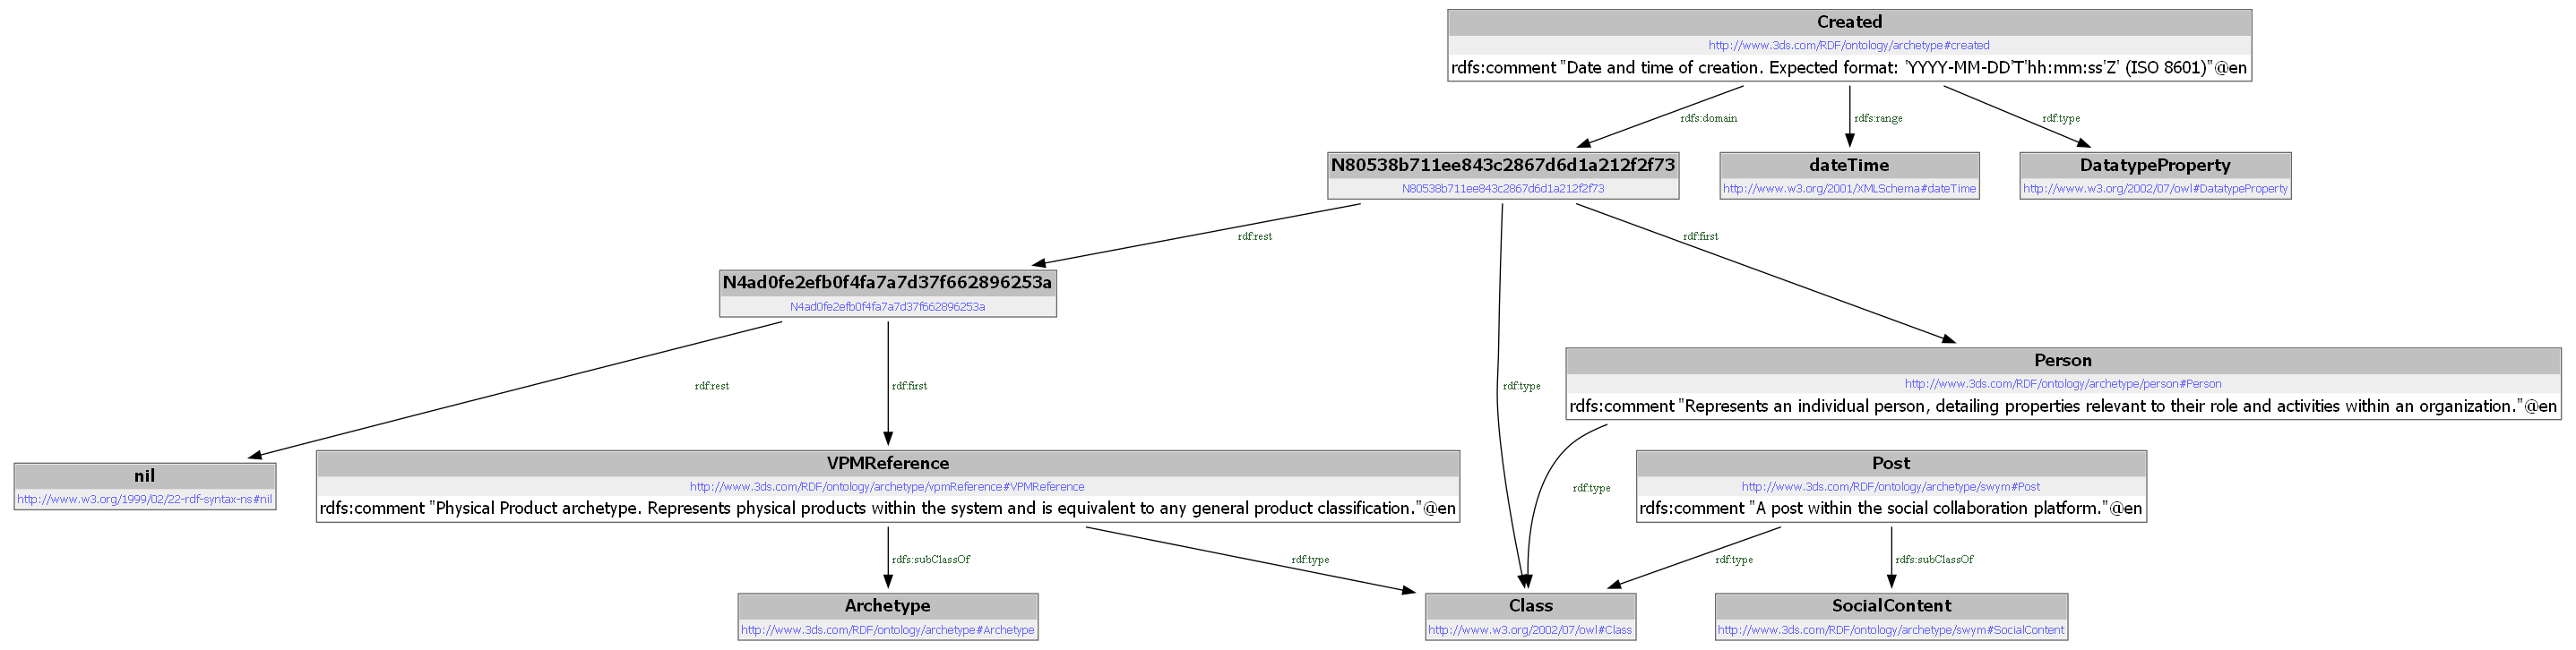

In [12]:
import rdflib
from rdflib.tools.rdf2dot import rdf2dot
from pydotplus import graph_from_dot_data
from IPython.display import Image, display
import io
def visualize_graph(graph):
    stream = io.StringIO()
    rdf2dot(graph, stream)
    dot_data = stream.getvalue()

    pydot_graph = graph_from_dot_data(dot_data)
    png_image = pydot_graph.create_png()
    display(Image(data=png_image))

visualize_graph(g)


2. Testing RDF Graphs



(dot.exe:28884): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:28884): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:28884): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



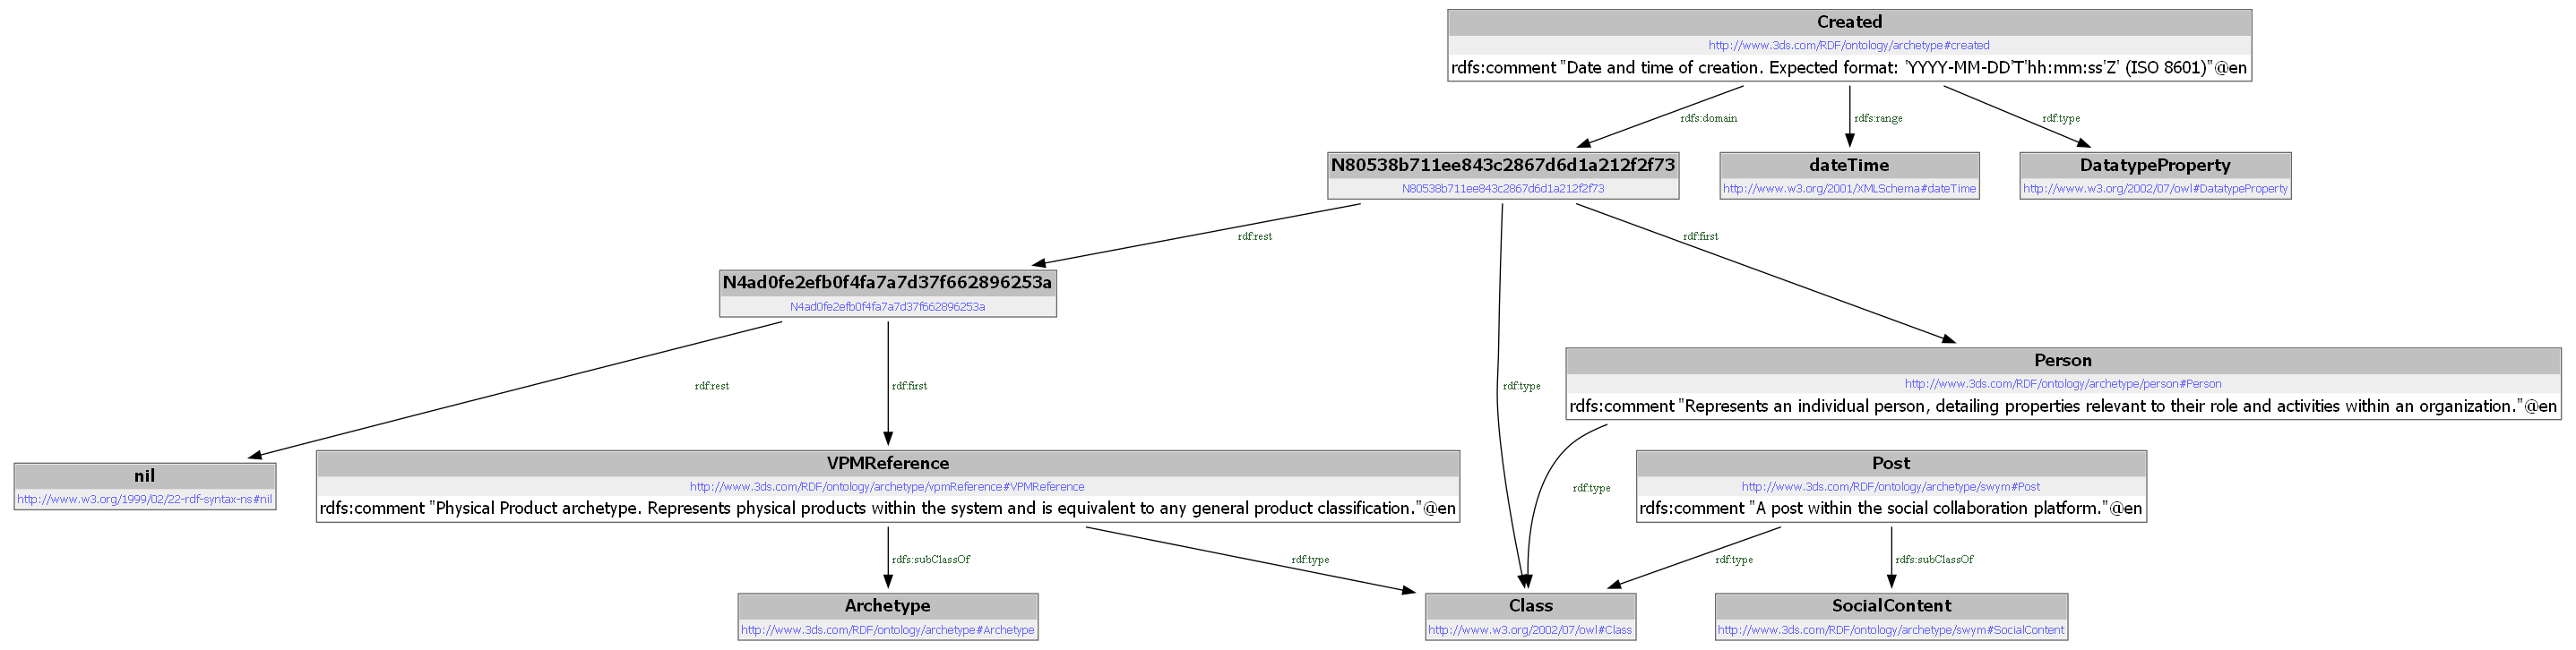

In [13]:
import rdflib
from rdflib.tools.rdf2dot import rdf2dot
from pydotplus import graph_from_dot_data
from IPython.display import Image, display
import io

def visualize_graph(graph):
    stream = io.StringIO()
    rdf2dot(graph, stream)
    dot_data = stream.getvalue()
    pydot_graph = graph_from_dot_data(dot_data)
    png_image = pydot_graph.create_png()
    display(Image(data=png_image))

visualize_graph(g)


In [14]:
def map_terms_to_rdf(entities, relationships):
    mapped_entities = {entity[0]: 'Unknown RDF Class' for entity, _ in entities}
    mapped_relationships = {rel[0]: 'Unknown RDF Property' for rel, _ in relationships}
    
    for term in mapped_entities:
        for s, p, o in g.triples((None, RDF.type, URIRef("http://www.w3.org/2002/07/owl#Class"))):
            if term in s:
                mapped_entities[term] = str(s)

    for term in mapped_relationships:
        for s, p, o in g.triples((None, RDF.type, RDF.Property)):
            if term in s:
                mapped_relationships[term] = str(s)

    return mapped_entities, mapped_relationships
query = "Give me all products created on June 1, 2024 by Idir."
doc = nlp(query)
entities = [(ent.text, ent.label_) for ent in doc.ents]
relationships = [(token.lemma_, token.dep_) for token in doc if not token.is_punct and not token.is_stop]

mapped_entities, mapped_relationships = map_terms_to_rdf(entities, relationships)
print("Mapped Entities:", mapped_entities)
print("Mapped Relationships:", mapped_relationships)

NameError: name 'URIRef' is not defined

In [17]:
def map_terms_to_rdf(text, graph):
    doc = nlp(text)
    mapped_entities = {}
    mapped_relationships = {}

    for ent in doc.ents:
        uri = f"vpm:{ent.text.replace(' ', '_')}" 
        if (URIRef(uri), None, None) in graph:
            mapped_entities[ent.text] = uri
        else:
            mapped_entities[ent.text] = 'Unknown RDF Class'

    for token in doc:
        if not token.is_stop and not token.is_punct and token.pos_ in ['VERB', 'ADP']:
            uri = f"vpm:{token.lemma_}"
            if (URIRef(uri), None, None) in graph:
                mapped_relationships[token.text] = uri
            else:
                mapped_relationships[token.text] = 'Unknown RDF Property'

    return mapped_entities, mapped_relationships


In [18]:
test_text = "Give me all products created on June 1, 2024 by Idir."
entities, relationships = map_terms_to_rdf(test_text, g)
print("Mapped Entities:", entities)
print("Mapped Relationships:", relationships)

NameError: name 'URIRef' is not defined

In [18]:
def generate_sparql(mapped_entities, mapped_relationships):
    entity_uris = ' '.join([f"?{k} <{v}>" for k, v in mapped_entities.items()])
    relationship_uris = ' '.join([f"?{k} <{v}>" for k, v in mapped_relationships.items()])

    query = f"""
    SELECT ?person ?role
    WHERE {{
        ?person {relationship_uris} ?entity .
        ?entity rdf:type {entity_uris} .
    }}
    """
    return query

sparql_query = generate_sparql(mapped_entities, mapped_relationships)
print("SPARQL Query:", sparql_query)


SPARQL Query: 
    SELECT ?person ?role
    WHERE {
        ?person ?give <Unknown RDF Property> ?I <Unknown RDF Property> ?all <Unknown RDF Property> ?product <Unknown RDF Property> ?create <Unknown RDF Property> ?on <Unknown RDF Property> ?june <Unknown RDF Property> ?1 <Unknown RDF Property> ?2024 <Unknown RDF Property> ?by <Unknown RDF Property> ?idir <Unknown RDF Property> ?entity .
        ?entity rdf:type ?june 1 2024 <Unknown RDF Class> .
    }
    
